In [1]:
import sys
sys.path.append("../")

from Config import *
from Utilities import *
from Solver import *
from Jam_generator import *
from Functions import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
dxs = [(2)**(-j)/10 for j in range(8)]
#dxs = [(2)**(-j)/10 for j in range(9)]
taus = [1, 5, 10]
base_path = "../Machine_scripts/Errors/LxF/"

# LxF

## T = 0.5

### $\tau = 1$

In [33]:
# Theoretic
rho_s = 0.433
v_minus = 26
tau_1 = 1

x_minus_tau_1, x_plus_tau_1, sol_v_tau_1, sol_v_eta_tau_1, m_tau_1, s_tau_1, values_v_tau_1 = jam_values(tau_1, rho_s, 60, v_minus=v_minus)

sol_rho_tau_1 = lambda x: 1/sol_v_tau_1.sol(x)[0]
sol_u_tau_1 = lambda x: rho_to_u(sol_rho_tau_1(x), m_tau_1, s_tau_1)

sol_rho_per_tau_1 = rho_per_gen(sol_rho_tau_1, x_plus_tau_1, x_minus_tau_1)
sol_u_per_tau_1 = u_per_gen(sol_u_tau_1, x_plus_tau_1, x_minus_tau_1)

sol_rho_eta_tau_1 = lambda x: 1/sol_v_eta_tau_1.sol(x)[0]
sol_u_eta_tau_1 = lambda x: rho_to_u(sol_rho_eta_tau_1(x), m_tau_1, s_tau_1)

def teo_rho_eta_tau_1(x, t):
    eta_minus = x_minus_tau_1 / tau_1
    eta_plus = x_plus_tau_1 / tau_1
    eta = (x - s_tau_1*t) / tau_1
    interval = eta_minus - eta_plus
    eta_per = (eta - eta_plus) % interval + eta_plus

    return sol_rho_eta_tau_1(eta_per)

def teo_u_eta_tau_1(x, t):
    eta_minus = x_minus_tau_1 / tau_1
    eta_plus = x_plus_tau_1 / tau_1
    eta = (x - s_tau_1*t) / tau_1
    interval = eta_minus - eta_plus
    eta_per = (eta - eta_plus) % interval + eta_plus

    return sol_u_eta_tau_1(eta_per)

Jamiton speed:  6.3739
m =  0.3559
x_+:  1.8784 x_-:  9.6108


In [34]:
T = 0.5
s_max = get_s_max()
L_tau_1 = np.abs(x_minus_tau_1 - x_plus_tau_1)
path_T = base_path + "rho_s_0.433_Final_time_0.5_heaven/"
xs = []
dts = []

rho_tau_1 = []
u_tau_1 = []

tau_1_folder = path_T + "tau_1/"

# Tau 1
for j in range(len(dxs)):
    dt = dxs[j]/(2.1*s_max)
    dts += [dt]
    rho_name = tau_1_folder + "rho_dx_{}.npy.gz".format(dxs[j])
    u_name = tau_1_folder + "u_dx_{}.npy.gz".format(dxs[j])

    rho_file = gzip.GzipFile(rho_name, "r")
    rho = np.load(rho_file)
    rho_tau_1 += [rho]

    u_file = gzip.GzipFile(u_name, "r")
    u = np.load(u_file)
    u_tau_1 += [u]

    N = int(L_tau_1/dxs[j]+1)
    x = np.linspace(0, L_tau_1, N)
    xs += [x]

In [35]:
errors_rho_LxF_tau_1 = []
errors_u_LxF_tau_1 = []
n = 0

for j in range(len(dxs)):
    dx = dxs[j]
    dt = dts[j]
    error_rho = 100 * norm(teo_rho_eta_tau_1(xs[j], T+n*dt)- rho_tau_1[j], 1)/norm(teo_rho_eta_tau_1(xs[j], T+n*dt), 1)
    errors_rho_LxF_tau_1 += [error_rho]

    error_u = 100 * norm(teo_u_eta_tau_1(xs[j], T+n*dt)- u_tau_1[j], 1)/norm(teo_u_eta_tau_1(xs[j], T+n*dt), 1)
    errors_u_LxF_tau_1 += [error_u]

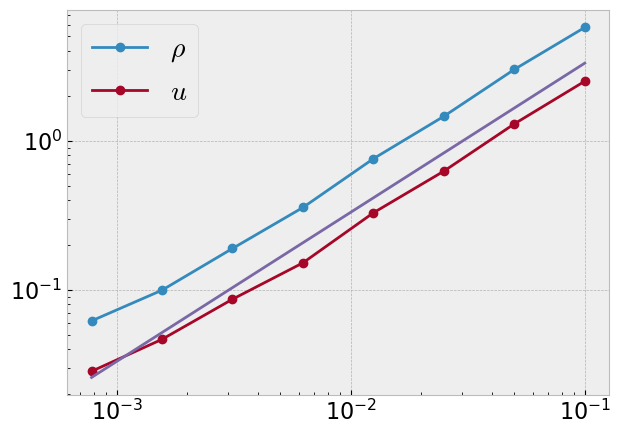

In [45]:
plt.plot(dxs, errors_rho_LxF_tau_1, "o-", label=r"$\rho$")
plt.plot(dxs, errors_u_LxF_tau_1, "o-", label=r"$u$")
plt.plot(dxs, np.array(dxs)**(1)*np.exp(3.5))
plt.legend()
plt.yscale("log")
plt.xscale("log")

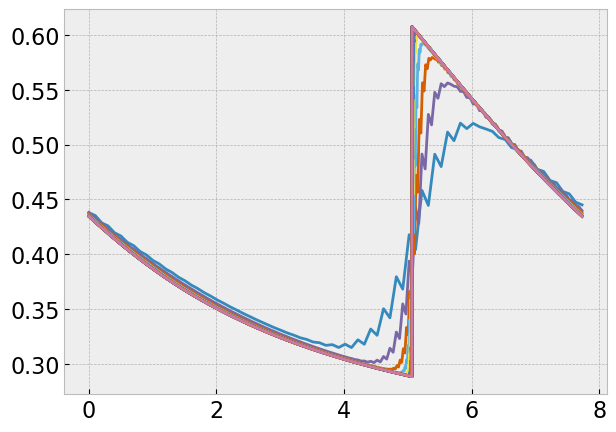

In [7]:
x_theo = np.linspace(0, L_tau_1, 100_000)
for j in range(len(dxs)):
    plt.plot(xs[j], rho_tau_1[j]/rho_max)
    plt.plot(x_theo, teo_rho_eta_tau_1(x_theo, T)/rho_max)

### $\tau = 5$

In [46]:
# Theoretic
rho_s = 0.433
v_minus = 26
tau_5 = 5

x_minus_tau_5, x_plus_tau_5, sol_v_tau_5, sol_v_eta_tau_5, m_tau_5, s_tau_5, values_v_tau_5 = jam_values(tau_5, rho_s, 60, v_minus=v_minus)

sol_rho_tau_5 = lambda x: 1/sol_v_tau_5.sol(x)[0]
sol_u_tau_5 = lambda x: rho_to_u(sol_rho_tau_5(x), m_tau_5, s_tau_5)

sol_rho_per_tau_5 = rho_per_gen(sol_rho_tau_5, x_plus_tau_5, x_minus_tau_5)
sol_u_per_tau_5 = u_per_gen(sol_u_tau_5, x_plus_tau_5, x_minus_tau_5)

sol_rho_eta_tau_5 = lambda x: 1/sol_v_eta_tau_5.sol(x)[0]
sol_u_eta_tau_5 = lambda x: rho_to_u(sol_rho_eta_tau_5(x), m_tau_5, s_tau_5)

def teo_rho_eta_tau_5(x, t):
    eta_minus = x_minus_tau_5 / tau_5
    eta_plus = x_plus_tau_5 / tau_5
    eta = (x - s_tau_5*t) / tau_5
    interval = eta_minus - eta_plus
    eta_per = (eta - eta_plus) % interval + eta_plus

    return sol_rho_eta_tau_5(eta_per)

def teo_u_eta_tau_5(x, t):
    eta_minus = x_minus_tau_5 / tau_5
    eta_plus = x_plus_tau_5 / tau_5
    eta = (x - s_tau_5*t) / tau_5
    interval = eta_minus - eta_plus
    eta_per = (eta - eta_plus) % interval + eta_plus

    return sol_u_eta_tau_5(eta_per)

Jamiton speed:  6.3739
m =  0.3559
x_+:  9.4073 x_-:  48.0918


In [47]:
T = 0.5
s_max = get_s_max()
L_tau_5 = np.abs(x_minus_tau_5 - x_plus_tau_5)
path_T = base_path + "rho_s_0.433_Final_time_0.5_heaven/"
xs = []
dts = []

rho_tau_5 = []
u_tau_5 = []

tau_5_folder = path_T + "tau_5/"

# Tau 1
for j in range(len(dxs)):
    dt = dxs[j]/(2.1*s_max)
    dts += [dt]
    rho_name = tau_5_folder + "rho_dx_{}.npy.gz".format(dxs[j])
    u_name = tau_5_folder + "u_dx_{}.npy.gz".format(dxs[j])

    rho_file = gzip.GzipFile(rho_name, "r")
    rho = np.load(rho_file)
    rho_tau_5 += [rho]

    u_file = gzip.GzipFile(u_name, "r")
    u = np.load(u_file)
    u_tau_5 += [u]

    N = int(L_tau_5/dxs[j]+1)
    x = np.linspace(0, L_tau_5, N)
    xs += [x]

In [48]:
errors_rho_LxF_tau_5 = []
errors_u_LxF_tau_5 = []
n = 0

for j in range(len(dxs)):
    dx = dxs[j]
    dt = dts[j]
    error_rho = 100 * norm(teo_rho_eta_tau_5(xs[j], T+n*dt)- rho_tau_5[j], 1)/norm(teo_rho_eta_tau_5(xs[j], T+n*dt), 1)
    errors_rho_LxF_tau_5 += [error_rho]

    error_u = 100 * norm(teo_u_eta_tau_5(xs[j], T+n*dt)- u_tau_5[j], 1)/norm(teo_u_eta_tau_5(xs[j], T+n*dt), 1)
    errors_u_LxF_tau_5 += [error_u]

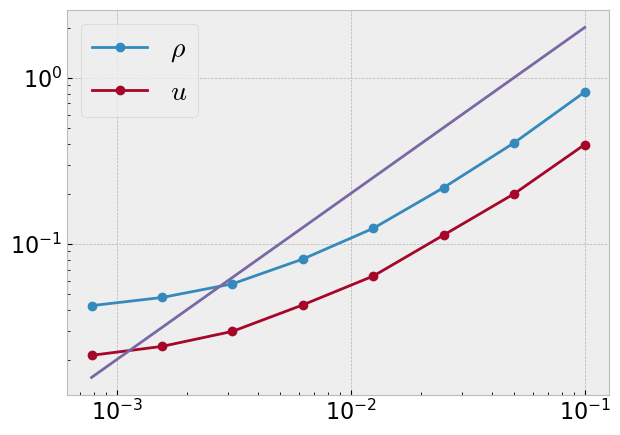

In [50]:
plt.plot(dxs, errors_rho_LxF_tau_5, "o-", label=r"$\rho$")
plt.plot(dxs, errors_u_LxF_tau_5, "o-", label=r"$u$")
plt.plot(dxs, np.array(dxs)**(1)*np.exp(3))
plt.legend()
plt.yscale("log")
plt.xscale("log")

### $\tau = 10$

In [12]:
# Theoretic
rho_s = 0.433
v_minus = 26
tau_10 = 10

x_minus_tau_10, x_plus_tau_10, sol_v_tau_10, sol_v_eta_tau_10, m_tau_10, s_tau_10, values_v_tau_10 = jam_values(tau_10, rho_s, 150, v_minus=v_minus)

sol_rho_tau_10 = lambda x: 1/sol_v_tau_10.sol(x)[0]
sol_u_tau_10 = lambda x: rho_to_u(sol_rho_tau_10(x), m_tau_10, s_tau_10)

sol_rho_per_tau_10 = rho_per_gen(sol_rho_tau_10, x_plus_tau_10, x_minus_tau_10)
sol_u_per_tau_10 = u_per_gen(sol_u_tau_10, x_plus_tau_10, x_minus_tau_10)

sol_rho_eta_tau_10 = lambda x: 1/sol_v_eta_tau_10.sol(x)[0]
sol_u_eta_tau_10 = lambda x: rho_to_u(sol_rho_eta_tau_10(x), m_tau_10, s_tau_10)

def teo_rho_eta_tau_10(x, t):
    eta_minus = x_minus_tau_10 / tau_10
    eta_plus = x_plus_tau_10 / tau_10
    eta = (x - s_tau_10*t) / tau_10
    interval = eta_minus - eta_plus
    eta_per = (eta - eta_plus) % interval + eta_plus

    return sol_rho_eta_tau_10(eta_per)

def teo_u_eta_tau_10(x, t):
    eta_minus = x_minus_tau_10 / tau_10
    eta_plus = x_plus_tau_10 / tau_10
    eta = (x - s_tau_10*t) / tau_10
    interval = eta_minus - eta_plus
    eta_per = (eta - eta_plus) % interval + eta_plus

    return sol_u_eta_tau_10(eta_per)

Jamiton speed:  6.3739
m =  0.3559
x_+:  18.7834 x_-:  96.0351


In [13]:
T = 0.5
s_max = get_s_max()
L_tau_10 = np.abs(x_minus_tau_10 - x_plus_tau_10)
path_T = base_path + "rho_s_0.433_Final_time_0.5_heaven/"
xs = []
dts = []

rho_tau_10 = []
u_tau_10 = []

tau_10_folder = path_T + "tau_10/"

# Tau 1
for j in range(len(dxs)):
    dt = dxs[j]/(2.1*s_max)
    dts += [dt]
    rho_name = tau_10_folder + "rho_dx_{}.npy.gz".format(dxs[j])
    u_name = tau_10_folder + "u_dx_{}.npy.gz".format(dxs[j])

    rho_file = gzip.GzipFile(rho_name, "r")
    rho = np.load(rho_file)
    rho_tau_10 += [rho]

    u_file = gzip.GzipFile(u_name, "r")
    u = np.load(u_file)
    u_tau_10 += [u]

    N = int(L_tau_10/dxs[j]+1)
    x = np.linspace(0, L_tau_10, N)
    xs += [x]

In [14]:
errors_rho_LxF_tau_10 = []
errors_u_LxF_tau_10 = []
n = 0

for j in range(len(dxs)):
    dx = dxs[j]
    dt = dts[j]
    error_rho = 100 * norm(teo_rho_eta_tau_10(xs[j], T+n*dt)- rho_tau_10[j], 1)/norm(teo_rho_eta_tau_10(xs[j], T+n*dt), 1)
    errors_rho_LxF_tau_10 += [error_rho]

    error_u = 100 * norm(teo_u_eta_tau_10(xs[j], T+n*dt)- u_tau_10[j], 1)/norm(teo_u_eta_tau_10(xs[j], T+n*dt), 1)
    errors_u_LxF_tau_10 += [error_u]

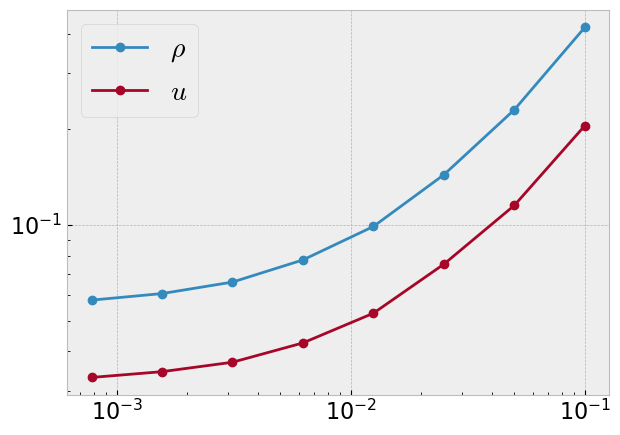

In [15]:
plt.plot(dxs, errors_rho_LxF_tau_10, "o-", label=r"$\rho$")
plt.plot(dxs, errors_u_LxF_tau_10, "o-", label=r"$u$")
plt.legend()
plt.yscale("log")
plt.xscale("log")

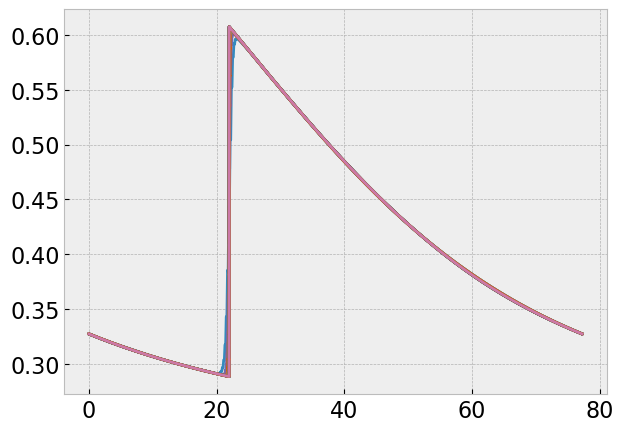

In [16]:
x_theo = np.linspace(0, L_tau_10, 100_000)
for j in range(len(dxs)):
    plt.plot(xs[j], rho_tau_10[j]/rho_max)
    plt.plot(x_theo, teo_rho_eta_tau_10(x_theo, T)/rho_max)

## T = 2

### $\tau = 1$

In [17]:
T = 2
s_max = get_s_max()
L_tau_1 = np.abs(x_minus_tau_1 - x_plus_tau_1)
path_T = base_path + "rho_s_0.433_Final_time_2_heaven/"
xs = []
dts = []

rho_tau_1 = []
u_tau_1 = []

tau_1_folder = path_T + "tau_1/"

# Tau 1
for j in range(len(dxs)):
    dt = dxs[j]/(2.1*s_max)
    dts += [dt]
    rho_name = tau_1_folder + "rho_dx_{}.npy.gz".format(dxs[j])
    u_name = tau_1_folder + "u_dx_{}.npy.gz".format(dxs[j])

    rho_file = gzip.GzipFile(rho_name, "r")
    rho = np.load(rho_file)
    rho_tau_1 += [rho]

    u_file = gzip.GzipFile(u_name, "r")
    u = np.load(u_file)
    u_tau_1 += [u]

    N = int(L_tau_1/dxs[j]+1)
    x = np.linspace(0, L_tau_1, N)
    xs += [x]

In [18]:
errors_rho_LxF_tau_1_T_2 = []
errors_u_LxF_tau_1_T_2 = []
n = 0

for j in range(len(dxs)):
    dx = dxs[j]
    dt = dts[j]
    error_rho = 100 * norm(teo_rho_eta_tau_1(xs[j], T+n*dt)- rho_tau_1[j], 1)/norm(teo_rho_eta_tau_1(xs[j], T+n*dt), 1)
    errors_rho_LxF_tau_1_T_2 += [error_rho]

    error_u = 100 * norm(teo_u_eta_tau_1(xs[j], T+n*dt)- u_tau_1[j], 1)/norm(teo_u_eta_tau_1(xs[j], T+n*dt), 1)
    errors_u_LxF_tau_1_T_2 += [error_u]

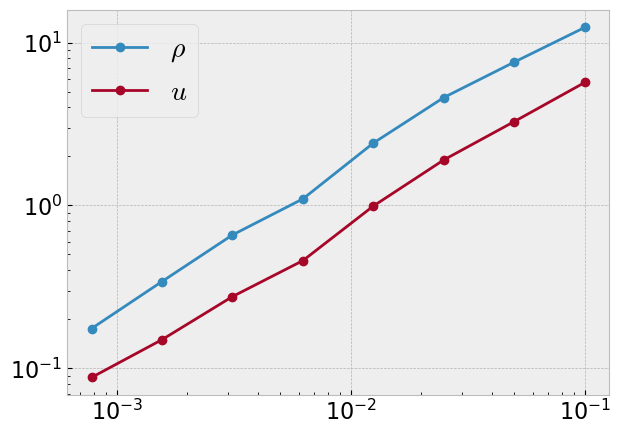

In [19]:
plt.plot(dxs, errors_rho_LxF_tau_1_T_2, "o-", label=r"$\rho$")
plt.plot(dxs, errors_u_LxF_tau_1_T_2, "o-", label=r"$u$")
plt.legend()
plt.yscale("log")
plt.xscale("log")

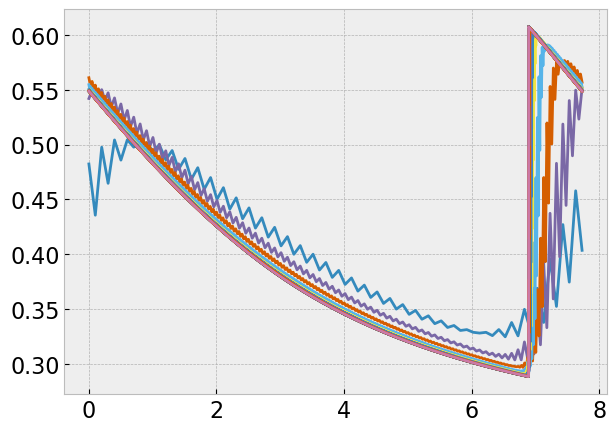

In [20]:
x_theo = np.linspace(0, L_tau_1, 100_000)
for j in range(len(dxs)):
    plt.plot(xs[j], rho_tau_1[j]/rho_max)
    plt.plot(x_theo, teo_rho_eta_tau_1(x_theo, T)/rho_max)

### $\tau = 5$

In [21]:
T = 2
s_max = get_s_max()
L_tau_5 = np.abs(x_minus_tau_5 - x_plus_tau_5)
path_T = base_path + "rho_s_0.433_Final_time_2_heaven/"
xs = []
dts = []

rho_tau_5 = []
u_tau_5 = []

tau_5_folder = path_T + "tau_5/"

# Tau 1
for j in range(len(dxs)):
    dt = dxs[j]/(2.1*s_max)
    dts += [dt]
    rho_name = tau_5_folder + "rho_dx_{}.npy.gz".format(dxs[j])
    u_name = tau_5_folder + "u_dx_{}.npy.gz".format(dxs[j])

    rho_file = gzip.GzipFile(rho_name, "r")
    rho = np.load(rho_file)
    rho_tau_5 += [rho]

    u_file = gzip.GzipFile(u_name, "r")
    u = np.load(u_file)
    u_tau_5 += [u]

    N = int(L_tau_5/dxs[j]+1)
    x = np.linspace(0, L_tau_5, N)
    xs += [x]

In [22]:
errors_rho_LxF_tau_5_T_2 = []
errors_u_LxF_tau_5_T_2 = []
n = 0

for j in range(len(dxs)):
    dx = dxs[j]
    dt = dts[j]
    error_rho = 100 * norm(teo_rho_eta_tau_5(xs[j], T+n*dt)- rho_tau_5[j], 1)/norm(teo_rho_eta_tau_5(xs[j], T+n*dt), 1)
    errors_rho_LxF_tau_5_T_2 += [error_rho]

    error_u = 100 * norm(teo_u_eta_tau_5(xs[j], T+n*dt)- u_tau_5[j], 1)/norm(teo_u_eta_tau_5(xs[j], T+n*dt), 1)
    errors_u_LxF_tau_5_T_2 += [error_u]

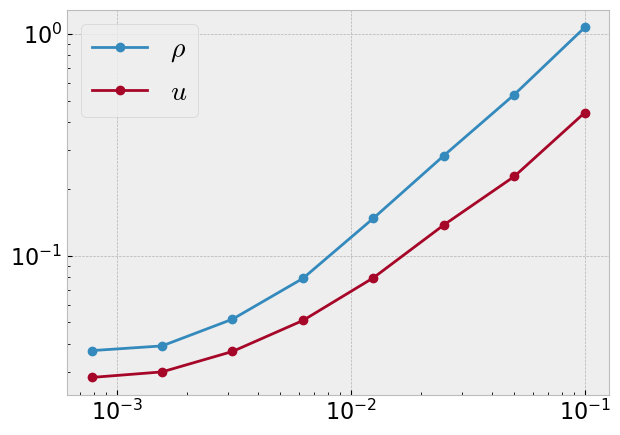

In [23]:
plt.plot(dxs, errors_rho_LxF_tau_5_T_2, "o-", label=r"$\rho$")
plt.plot(dxs, errors_u_LxF_tau_5_T_2, "o-", label=r"$u$")
plt.legend()
plt.yscale("log")
plt.xscale("log")

### $\tau = 10$

In [24]:
T = 2
s_max = get_s_max()
L_tau_10 = np.abs(x_minus_tau_10 - x_plus_tau_10)
path_T = base_path + "rho_s_0.433_Final_time_2_heaven/"
xs = []
dts = []

rho_tau_10 = []
u_tau_10 = []

tau_10_folder = path_T + "tau_10/"

# Tau 1
for j in range(len(dxs)):
    dt = dxs[j]/(2.1*s_max)
    dts += [dt]
    rho_name = tau_10_folder + "rho_dx_{}.npy.gz".format(dxs[j])
    u_name = tau_10_folder + "u_dx_{}.npy.gz".format(dxs[j])

    rho_file = gzip.GzipFile(rho_name, "r")
    rho = np.load(rho_file)
    rho_tau_10 += [rho]

    u_file = gzip.GzipFile(u_name, "r")
    u = np.load(u_file)
    u_tau_10 += [u]

    N = int(L_tau_10/dxs[j]+1)
    x = np.linspace(0, L_tau_10, N)
    xs += [x]

In [25]:
errors_rho_LxF_tau_10_T_2 = []
errors_u_LxF_tau_10_T_2 = []
n = 0

for j in range(len(dxs)):
    dx = dxs[j]
    dt = dts[j]
    error_rho = 100 * norm(teo_rho_eta_tau_10(xs[j], T+n*dt)- rho_tau_10[j], 1)/norm(teo_rho_eta_tau_10(xs[j], T+n*dt), 1)
    errors_rho_LxF_tau_10_T_2 += [error_rho]

    error_u = 100 * norm(teo_u_eta_tau_10(xs[j], T+n*dt)- u_tau_10[j], 1)/norm(teo_u_eta_tau_10(xs[j], T+n*dt), 1)
    errors_u_LxF_tau_10_T_2 += [error_u]

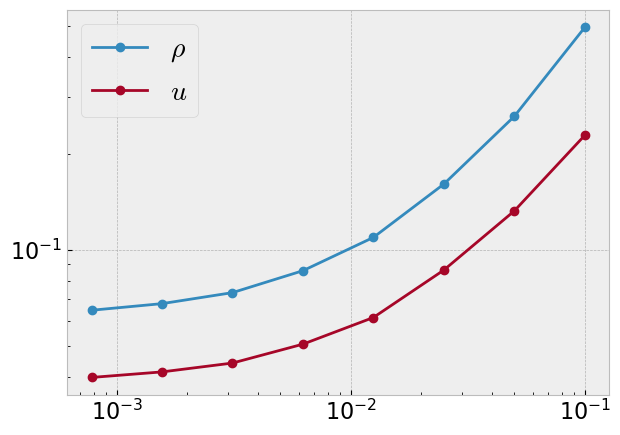

In [26]:
plt.plot(dxs, errors_rho_LxF_tau_10_T_2, "o-", label=r"$\rho$")
plt.plot(dxs, errors_u_LxF_tau_10_T_2, "o-", label=r"$u$")
plt.legend()
plt.yscale("log")
plt.xscale("log")

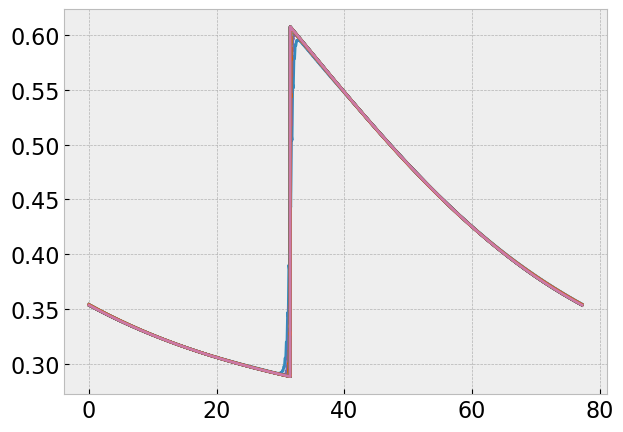

In [27]:
x_theo = np.linspace(0, L_tau_10, 100_000)
for j in range(len(dxs)):
    plt.plot(xs[j], rho_tau_10[j]/rho_max)
    plt.plot(x_theo, teo_rho_eta_tau_10(x_theo, T)/rho_max)

## Table

In [30]:
import pandas as pd

dxs = [(2)**(-j)/10 for j in range(8)]
dxs_sci = [sci_notation(dx) for dx in dxs]

In [31]:
col = pd.MultiIndex.from_arrays([
    [r'$\tau=1$', r'$\tau=1$', r'$\tau=5$', r'$\tau=5$', r'$\tau=10$', r'$\tau=10$'],
    [r"$\varepsilon_\rho^{\Delta x}$", r"$\varepsilon_u^{\Delta x}$", 
     r"$\varepsilon_\rho^{\Delta x}$", r"$\varepsilon_u^{\Delta x}$", 
     r"$\varepsilon_\rho^{\Delta x}$", r"$\varepsilon_u^{\Delta x}$"]
    ])


errors = np.array([errors_rho_LxF_tau_1, errors_u_LxF_tau_1, 
                             errors_rho_LxF_tau_5, errors_u_LxF_tau_5, 
                             errors_rho_LxF_tau_10, errors_u_LxF_tau_10]).T

data_LxF = pd.DataFrame(errors, columns=col, index=dxs_sci)
data_LxF.index.name=r"$\Delta x$"
data_LxF.to_latex(float_format="%.7f", buf="Img/Errors_tables/errors_LxF_T_0.5.txt")
data_LxF

$\tau=1$  \
                       $\varepsilon_\rho^{\Delta x}$   
$\Delta x$                                             
1.00 $ \times 10^{-1}$                      5.747175   
5.00 $ \times 10^{-2}$                      3.004572   
2.50 $ \times 10^{-2}$                      1.457067   
1.25 $ \times 10^{-2}$                      0.757277   
6.25 $ \times 10^{-3}$                      0.356655   
3.12 $ \times 10^{-3}$                      0.189400   
1.56 $ \times 10^{-3}$                      0.099498   
7.81 $ \times 10^{-4}$                      0.061934   

                                                   \
                       $\varepsilon_u^{\Delta x}$   
$\Delta x$                                          
1.00 $ \times 10^{-1}$                   2.504339   
5.00 $ \times 10^{-2}$                   1.296221   
2.50 $ \times 10^{-2}$                   0.624841   
1.25 $ \times 10^{-2}$                   0.328489   
6.25 $ \times 10^{-3}$                   0.151744   
3.12 $ \times 10^{-3}$                   0.086532   
1.56 $ \times 10^{-3}$                   0.046595   
7.81 $ \times 10^{-4}$                   0.028434   

                                            $\tau=5$  \
                       $\varepsilon_\rho^{\Delta x}$   
$\Delta x$                                             
1.00 $ \times 10^{-1}$                      0.820608   
5.00 $ \times 10^{-2}$                      0.406254   
2.50 $ \times 10^{-2}$                      0.218374   
1.25 $ \times 10^{-2}$                      0.124086   
6.25 $ \times 10^{-3}$                      0.081031   
3.12 $ \times 10^{-3}$                      0.057425   
1.56 $ \times 10^{-3}$                      0.047536   
7.81 $ \times 10^{-4}$                      0.042451   

                                                   \
                       $\varepsilon_u^{\Delta x}$   
$\Delta x$                                          
1.00 $ \times 10^{-1}$                   0.396270   
5.00 $ \times 10^{-2}$                   0.200417   
2.50 $ \times 10^{-2}$                   0.113141   
1.25 $ \times 10^{-2}$                   0.064027   
6.25 $ \times 10^{-3}$                   0.042913   
3.12 $ \times 10^{-3}$                   0.029717   
1.56 $ \times 10^{-3}$                   0.024131   
7.81 $ \times 10^{-4}$                   0.021319   

                                           $\tau=10$  \
                       $\varepsilon_\rho^{\Delta x}$   
$\Delta x$                                             
1.00 $ \times 10^{-1}$                      0.418906   
5.00 $ \times 10^{-2}$                      0.230540   
2.50 $ \times 10^{-2}$                      0.143898   
1.25 $ \times 10^{-2}$                      0.098906   
6.25 $ \times 10^{-3}$                      0.077619   
3.12 $ \times 10^{-3}$                      0.066096   
1.56 $ \times 10^{-3}$                      0.060817   
7.81 $ \times 10^{-4}$                      0.057987   

                                                   
                       $\varepsilon_u^{\Delta x}$  
$\Delta x$                                         
1.00 $ \times 10^{-1}$                   0.205364  
5.00 $ \times 10^{-2}$                   0.115219  
2.50 $ \times 10^{-2}$                   0.075239  
1.25 $ \times 10^{-2}$                   0.052733  
6.25 $ \times 10^{-3}$                   0.042517  
3.12 $ \times 10^{-3}$                   0.036961  
1.56 $ \times 10^{-3}$                   0.034519  
7.81 $ \times 10^{-4}$                   0.033103

In [32]:
errors_T_2 = np.array([errors_rho_LxF_tau_1_T_2, errors_u_LxF_tau_1_T_2, 
                             errors_rho_LxF_tau_5_T_2, errors_u_LxF_tau_5_T_2, 
                             errors_rho_LxF_tau_10_T_2, errors_u_LxF_tau_10_T_2]).T

data_LxF_T_2 = pd.DataFrame(errors_T_2, columns=col, index=dxs_sci)
data_LxF_T_2.index.name=r"$\Delta x$"
data_LxF_T_2.to_latex(float_format="%.7f", buf="Img/Errors_tables/errors_LxF_T_2.txt")
data_LxF_T_2

$\tau=1$  \
                       $\varepsilon_\rho^{\Delta x}$   
$\Delta x$                                             
1.00 $ \times 10^{-1}$                     12.394580   
5.00 $ \times 10^{-2}$                      7.593190   
2.50 $ \times 10^{-2}$                      4.601162   
1.25 $ \times 10^{-2}$                      2.417000   
6.25 $ \times 10^{-3}$                      1.097755   
3.12 $ \times 10^{-3}$                      0.659061   
1.56 $ \times 10^{-3}$                      0.341088   
7.81 $ \times 10^{-4}$                      0.175425   

                                                   \
                       $\varepsilon_u^{\Delta x}$   
$\Delta x$                                          
1.00 $ \times 10^{-1}$                   5.690833   
5.00 $ \times 10^{-2}$                   3.276197   
2.50 $ \times 10^{-2}$                   1.904922   
1.25 $ \times 10^{-2}$                   0.991989   
6.25 $ \times 10^{-3}$                   0.458543   
3.12 $ \times 10^{-3}$                   0.275635   
1.56 $ \times 10^{-3}$                   0.149905   
7.81 $ \times 10^{-4}$                   0.087850   

                                            $\tau=5$  \
                       $\varepsilon_\rho^{\Delta x}$   
$\Delta x$                                             
1.00 $ \times 10^{-1}$                      1.067918   
5.00 $ \times 10^{-2}$                      0.531722   
2.50 $ \times 10^{-2}$                      0.282198   
1.25 $ \times 10^{-2}$                      0.147248   
6.25 $ \times 10^{-3}$                      0.078877   
3.12 $ \times 10^{-3}$                      0.051643   
1.56 $ \times 10^{-3}$                      0.039131   
7.81 $ \times 10^{-4}$                      0.037264   

                                                   \
                       $\varepsilon_u^{\Delta x}$   
$\Delta x$                                          
1.00 $ \times 10^{-1}$                   0.440863   
5.00 $ \times 10^{-2}$                   0.227353   
2.50 $ \times 10^{-2}$                   0.137409   
1.25 $ \times 10^{-2}$                   0.079361   
6.25 $ \times 10^{-3}$                   0.050958   
3.12 $ \times 10^{-3}$                   0.036937   
1.56 $ \times 10^{-3}$                   0.029879   
7.81 $ \times 10^{-4}$                   0.028209   

                                           $\tau=10$  \
                       $\varepsilon_\rho^{\Delta x}$   
$\Delta x$                                             
1.00 $ \times 10^{-1}$                      0.495909   
5.00 $ \times 10^{-2}$                      0.261383   
2.50 $ \times 10^{-2}$                      0.160532   
1.25 $ \times 10^{-2}$                      0.109350   
6.25 $ \times 10^{-3}$                      0.086051   
3.12 $ \times 10^{-3}$                      0.073485   
1.56 $ \times 10^{-3}$                      0.067886   
7.81 $ \times 10^{-4}$                      0.064729   

                                                   
                       $\varepsilon_u^{\Delta x}$  
$\Delta x$                                         
1.00 $ \times 10^{-1}$                   0.228013  
5.00 $ \times 10^{-2}$                   0.132316  
2.50 $ \times 10^{-2}$                   0.086442  
1.25 $ \times 10^{-2}$                   0.061435  
6.25 $ \times 10^{-3}$                   0.050705  
3.12 $ \times 10^{-3}$                   0.044258  
1.56 $ \times 10^{-3}$                   0.041527  
7.81 $ \times 10^{-4}$                   0.039904

# HLL

In [3]:
base_path = "../Machine_scripts/Errors/HLL/"

## T = 0.5

### $\tau = 1$

In [4]:
# Theoretic
rho_s = 0.433
v_minus = 26
tau_1 = 1

x_minus_tau_1, x_plus_tau_1, sol_v_tau_1, sol_v_eta_tau_1, m_tau_1, s_tau_1, values_v_tau_1 = jam_values(tau_1, rho_s, 60, v_minus=v_minus)

sol_rho_tau_1 = lambda x: 1/sol_v_tau_1.sol(x)[0]
sol_u_tau_1 = lambda x: rho_to_u(sol_rho_tau_1(x), m_tau_1, s_tau_1)

sol_rho_per_tau_1 = rho_per_gen(sol_rho_tau_1, x_plus_tau_1, x_minus_tau_1)
sol_u_per_tau_1 = u_per_gen(sol_u_tau_1, x_plus_tau_1, x_minus_tau_1)

sol_rho_eta_tau_1 = lambda x: 1/sol_v_eta_tau_1.sol(x)[0]
sol_u_eta_tau_1 = lambda x: rho_to_u(sol_rho_eta_tau_1(x), m_tau_1, s_tau_1)

def teo_rho_eta_tau_1(x, t):
    eta_minus = x_minus_tau_1 / tau_1
    eta_plus = x_plus_tau_1 / tau_1
    eta = (x - s_tau_1*t) / tau_1
    interval = eta_minus - eta_plus
    eta_per = (eta - eta_plus) % interval + eta_plus

    return sol_rho_eta_tau_1(eta_per)

def teo_u_eta_tau_1(x, t):
    eta_minus = x_minus_tau_1 / tau_1
    eta_plus = x_plus_tau_1 / tau_1
    eta = (x - s_tau_1*t) / tau_1
    interval = eta_minus - eta_plus
    eta_per = (eta - eta_plus) % interval + eta_plus

    return sol_u_eta_tau_1(eta_per)

Jamiton speed:  6.3739
m =  0.3559
x_+:  1.8784 x_-:  9.6108


In [5]:
T = 0.5
s_max = get_s_max()
L_tau_1 = np.abs(x_minus_tau_1 - x_plus_tau_1)
path_T = base_path + "rho_s_0.433_Final_time_0.5/"
xs = []
dts = []

rho_tau_1 = []
u_tau_1 = []

tau_1_folder = path_T + "tau_1/"

# Tau 1
for j in range(len(dxs)):
    dt = dxs[j]/(2.1*s_max)
    dts += [dt]
    rho_name = tau_1_folder + "rho_dx_{}.npy.gz".format(dxs[j])
    u_name = tau_1_folder + "u_dx_{}.npy.gz".format(dxs[j])

    rho_file = gzip.GzipFile(rho_name, "r")
    rho = np.load(rho_file)
    rho_tau_1 += [rho]

    u_file = gzip.GzipFile(u_name, "r")
    u = np.load(u_file)
    u_tau_1 += [u]

    N = int(L_tau_1/dxs[j]+1)
    x = np.linspace(0, L_tau_1, N)
    xs += [x]

In [6]:
errors_rho_HLL_tau_1 = []
errors_u_HLL_tau_1 = []
n = 0

for j in range(len(dxs)):
    dx = dxs[j]
    dt = dts[j]
    error_rho = 100 * norm(teo_rho_eta_tau_1(xs[j], T+n*dt)- rho_tau_1[j], 1)/norm(teo_rho_eta_tau_1(xs[j], T+n*dt), 1)
    errors_rho_HLL_tau_1 += [error_rho]

    error_u = 100 * norm(teo_u_eta_tau_1(xs[j], T+n*dt)- u_tau_1[j], 1)/norm(teo_u_eta_tau_1(xs[j], T+n*dt), 1)
    errors_u_HLL_tau_1 += [error_u]

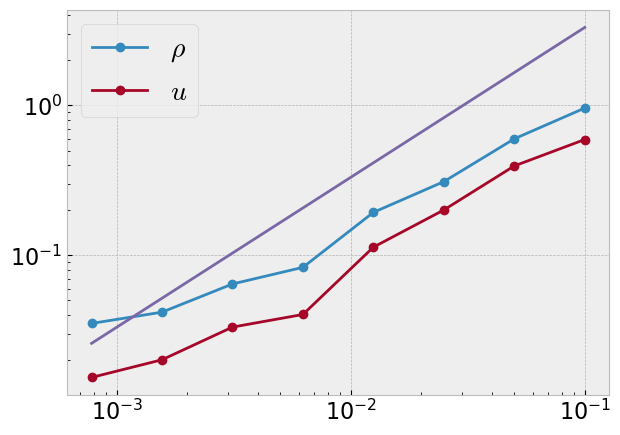

In [7]:
plt.plot(dxs, errors_rho_HLL_tau_1, "o-", label=r"$\rho$")
plt.plot(dxs, errors_u_HLL_tau_1, "o-", label=r"$u$")
plt.plot(dxs, np.array(dxs)**(1)*np.exp(3.5))
plt.legend()
plt.yscale("log")
plt.xscale("log")

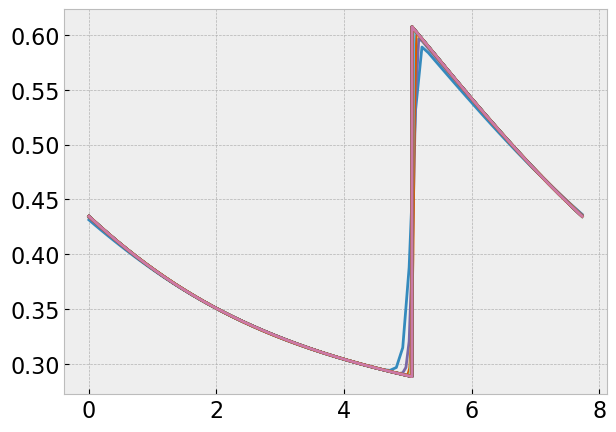

In [8]:
x_theo = np.linspace(0, L_tau_1, 100_000)
for j in range(len(dxs)):
    plt.plot(xs[j], rho_tau_1[j]/rho_max)
    plt.plot(x_theo, teo_rho_eta_tau_1(x_theo, T)/rho_max)

### $\tau = 5$

In [9]:
# Theoretic
rho_s = 0.433
v_minus = 26
tau_5 = 5

x_minus_tau_5, x_plus_tau_5, sol_v_tau_5, sol_v_eta_tau_5, m_tau_5, s_tau_5, values_v_tau_5 = jam_values(tau_5, rho_s, 60, v_minus=v_minus)

sol_rho_tau_5 = lambda x: 1/sol_v_tau_5.sol(x)[0]
sol_u_tau_5 = lambda x: rho_to_u(sol_rho_tau_5(x), m_tau_5, s_tau_5)

sol_rho_per_tau_5 = rho_per_gen(sol_rho_tau_5, x_plus_tau_5, x_minus_tau_5)
sol_u_per_tau_5 = u_per_gen(sol_u_tau_5, x_plus_tau_5, x_minus_tau_5)

sol_rho_eta_tau_5 = lambda x: 1/sol_v_eta_tau_5.sol(x)[0]
sol_u_eta_tau_5 = lambda x: rho_to_u(sol_rho_eta_tau_5(x), m_tau_5, s_tau_5)

def teo_rho_eta_tau_5(x, t):
    eta_minus = x_minus_tau_5 / tau_5
    eta_plus = x_plus_tau_5 / tau_5
    eta = (x - s_tau_5*t) / tau_5
    interval = eta_minus - eta_plus
    eta_per = (eta - eta_plus) % interval + eta_plus

    return sol_rho_eta_tau_5(eta_per)

def teo_u_eta_tau_5(x, t):
    eta_minus = x_minus_tau_5 / tau_5
    eta_plus = x_plus_tau_5 / tau_5
    eta = (x - s_tau_5*t) / tau_5
    interval = eta_minus - eta_plus
    eta_per = (eta - eta_plus) % interval + eta_plus

    return sol_u_eta_tau_5(eta_per)

Jamiton speed:  6.3739
m =  0.3559
x_+:  9.4073 x_-:  48.0918


In [10]:
T = 0.5
s_max = get_s_max()
L_tau_5 = np.abs(x_minus_tau_5 - x_plus_tau_5)
path_T = base_path + "rho_s_0.433_Final_time_0.5/"
xs = []
dts = []

rho_tau_5 = []
u_tau_5 = []

tau_5_folder = path_T + "tau_5/"

# Tau 1
for j in range(len(dxs)):
    dt = dxs[j]/(2.1*s_max)
    dts += [dt]
    rho_name = tau_5_folder + "rho_dx_{}.npy.gz".format(dxs[j])
    u_name = tau_5_folder + "u_dx_{}.npy.gz".format(dxs[j])

    rho_file = gzip.GzipFile(rho_name, "r")
    rho = np.load(rho_file)
    rho_tau_5 += [rho]

    u_file = gzip.GzipFile(u_name, "r")
    u = np.load(u_file)
    u_tau_5 += [u]

    N = int(L_tau_5/dxs[j]+1)
    x = np.linspace(0, L_tau_5, N)
    xs += [x]

In [11]:
errors_rho_HLL_tau_5 = []
errors_u_HLL_tau_5 = []
n = 0

for j in range(len(dxs)):
    dx = dxs[j]
    dt = dts[j]
    error_rho = 100 * norm(teo_rho_eta_tau_5(xs[j], T+n*dt)- rho_tau_5[j], 1)/norm(teo_rho_eta_tau_5(xs[j], T+n*dt), 1)
    errors_rho_HLL_tau_5 += [error_rho]

    error_u = 100 * norm(teo_u_eta_tau_5(xs[j], T+n*dt)- u_tau_5[j], 1)/norm(teo_u_eta_tau_5(xs[j], T+n*dt), 1)
    errors_u_HLL_tau_5 += [error_u]

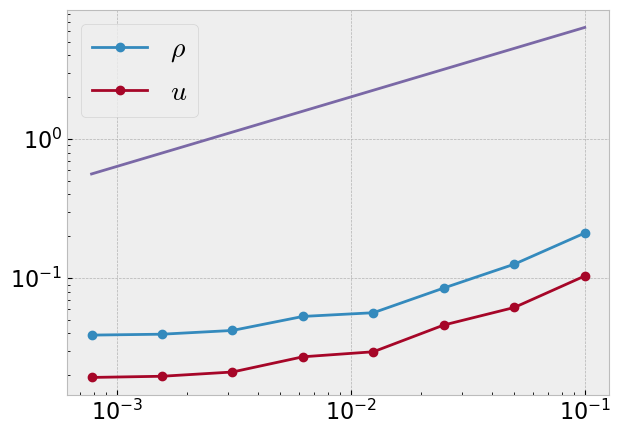

In [12]:
plt.plot(dxs, errors_rho_HLL_tau_5, "o-", label=r"$\rho$")
plt.plot(dxs, errors_u_HLL_tau_5, "o-", label=r"$u$")
plt.plot(dxs, np.array(dxs)**(1/2)*np.exp(3))
plt.legend()
plt.yscale("log")
plt.xscale("log")

### $\tau = 10$

In [13]:
# Theoretic
rho_s = 0.433
v_minus = 26
tau_10 = 10

x_minus_tau_10, x_plus_tau_10, sol_v_tau_10, sol_v_eta_tau_10, m_tau_10, s_tau_10, values_v_tau_10 = jam_values(tau_10, rho_s, 150, v_minus=v_minus)

sol_rho_tau_10 = lambda x: 1/sol_v_tau_10.sol(x)[0]
sol_u_tau_10 = lambda x: rho_to_u(sol_rho_tau_10(x), m_tau_10, s_tau_10)

sol_rho_per_tau_10 = rho_per_gen(sol_rho_tau_10, x_plus_tau_10, x_minus_tau_10)
sol_u_per_tau_10 = u_per_gen(sol_u_tau_10, x_plus_tau_10, x_minus_tau_10)

sol_rho_eta_tau_10 = lambda x: 1/sol_v_eta_tau_10.sol(x)[0]
sol_u_eta_tau_10 = lambda x: rho_to_u(sol_rho_eta_tau_10(x), m_tau_10, s_tau_10)

def teo_rho_eta_tau_10(x, t):
    eta_minus = x_minus_tau_10 / tau_10
    eta_plus = x_plus_tau_10 / tau_10
    eta = (x - s_tau_10*t) / tau_10
    interval = eta_minus - eta_plus
    eta_per = (eta - eta_plus) % interval + eta_plus

    return sol_rho_eta_tau_10(eta_per)

def teo_u_eta_tau_10(x, t):
    eta_minus = x_minus_tau_10 / tau_10
    eta_plus = x_plus_tau_10 / tau_10
    eta = (x - s_tau_10*t) / tau_10
    interval = eta_minus - eta_plus
    eta_per = (eta - eta_plus) % interval + eta_plus

    return sol_u_eta_tau_10(eta_per)

Jamiton speed:  6.3739
m =  0.3559
x_+:  18.7834 x_-:  96.0351


In [14]:
T = 0.5
s_max = get_s_max()
L_tau_10 = np.abs(x_minus_tau_10 - x_plus_tau_10)
path_T = base_path + "rho_s_0.433_Final_time_0.5/"
xs = []
dts = []

rho_tau_10 = []
u_tau_10 = []

tau_10_folder = path_T + "tau_10/"

# Tau 1
for j in range(len(dxs)):
    dt = dxs[j]/(2.1*s_max)
    dts += [dt]
    rho_name = tau_10_folder + "rho_dx_{}.npy.gz".format(dxs[j])
    u_name = tau_10_folder + "u_dx_{}.npy.gz".format(dxs[j])

    rho_file = gzip.GzipFile(rho_name, "r")
    rho = np.load(rho_file)
    rho_tau_10 += [rho]

    u_file = gzip.GzipFile(u_name, "r")
    u = np.load(u_file)
    u_tau_10 += [u]

    N = int(L_tau_10/dxs[j]+1)
    x = np.linspace(0, L_tau_10, N)
    xs += [x]

In [15]:
errors_rho_HLL_tau_10 = []
errors_u_HLL_tau_10 = []
n = 0

for j in range(len(dxs)):
    dx = dxs[j]
    dt = dts[j]
    error_rho = 100 * norm(teo_rho_eta_tau_10(xs[j], T+n*dt)- rho_tau_10[j], 1)/norm(teo_rho_eta_tau_10(xs[j], T+n*dt), 1)
    errors_rho_HLL_tau_10 += [error_rho]

    error_u = 100 * norm(teo_u_eta_tau_10(xs[j], T+n*dt)- u_tau_10[j], 1)/norm(teo_u_eta_tau_10(xs[j], T+n*dt), 1)
    errors_u_HLL_tau_10 += [error_u]

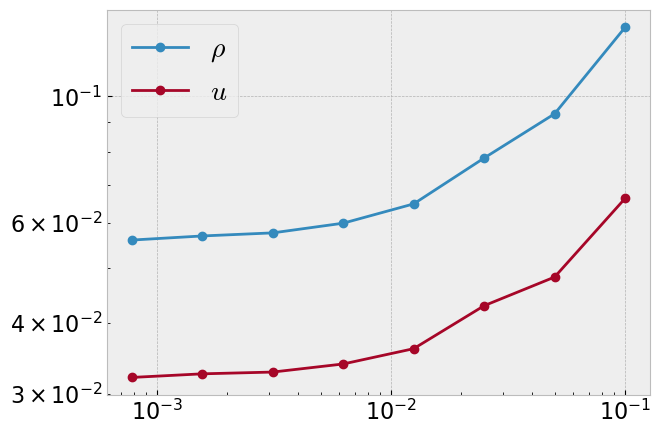

In [16]:
plt.plot(dxs, errors_rho_HLL_tau_10, "o-", label=r"$\rho$")
plt.plot(dxs, errors_u_HLL_tau_10, "o-", label=r"$u$")
plt.legend()
plt.yscale("log")
plt.xscale("log")

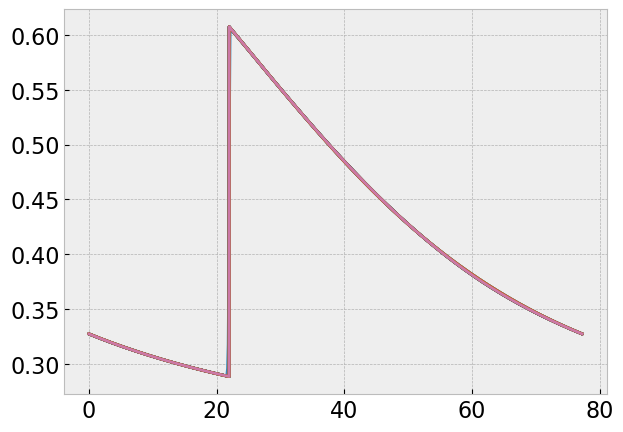

In [17]:
x_theo = np.linspace(0, L_tau_10, 100_000)
for j in range(len(dxs)):
    plt.plot(xs[j], rho_tau_10[j]/rho_max)
    plt.plot(x_theo, teo_rho_eta_tau_10(x_theo, T)/rho_max)

## T = 2

### $\tau = 1$

In [18]:
T = 2
s_max = get_s_max()
L_tau_1 = np.abs(x_minus_tau_1 - x_plus_tau_1)
path_T = base_path + "rho_s_0.433_Final_time_2/"
xs = []
dts = []

rho_tau_1 = []
u_tau_1 = []

tau_1_folder = path_T + "tau_1/"

# Tau 1
for j in range(len(dxs)):
    dt = dxs[j]/(2.1*s_max)
    dts += [dt]
    rho_name = tau_1_folder + "rho_dx_{}.npy.gz".format(dxs[j])
    u_name = tau_1_folder + "u_dx_{}.npy.gz".format(dxs[j])

    rho_file = gzip.GzipFile(rho_name, "r")
    rho = np.load(rho_file)
    rho_tau_1 += [rho]

    u_file = gzip.GzipFile(u_name, "r")
    u = np.load(u_file)
    u_tau_1 += [u]

    N = int(L_tau_1/dxs[j]+1)
    x = np.linspace(0, L_tau_1, N)
    xs += [x]

In [19]:
errors_rho_HLL_tau_1_T_2 = []
errors_u_HLL_tau_1_T_2 = []
n = 0

for j in range(len(dxs)):
    dx = dxs[j]
    dt = dts[j]
    error_rho = 100 * norm(teo_rho_eta_tau_1(xs[j], T+n*dt)- rho_tau_1[j], 1)/norm(teo_rho_eta_tau_1(xs[j], T+n*dt), 1)
    errors_rho_HLL_tau_1_T_2 += [error_rho]

    error_u = 100 * norm(teo_u_eta_tau_1(xs[j], T+n*dt)- u_tau_1[j], 1)/norm(teo_u_eta_tau_1(xs[j], T+n*dt), 1)
    errors_u_HLL_tau_1_T_2 += [error_u]

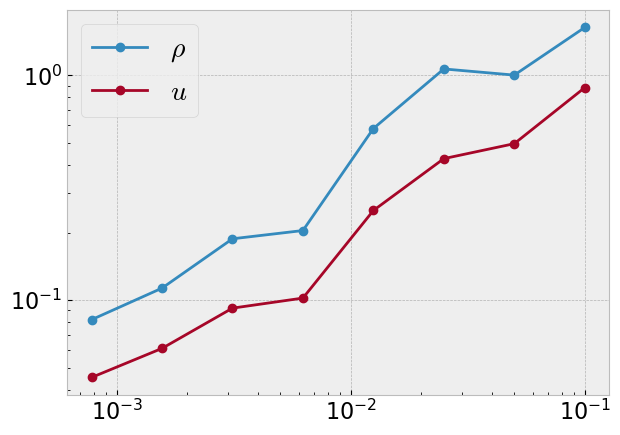

In [20]:
plt.plot(dxs, errors_rho_HLL_tau_1_T_2, "o-", label=r"$\rho$")
plt.plot(dxs, errors_u_HLL_tau_1_T_2, "o-", label=r"$u$")
plt.legend()
plt.yscale("log")
plt.xscale("log")

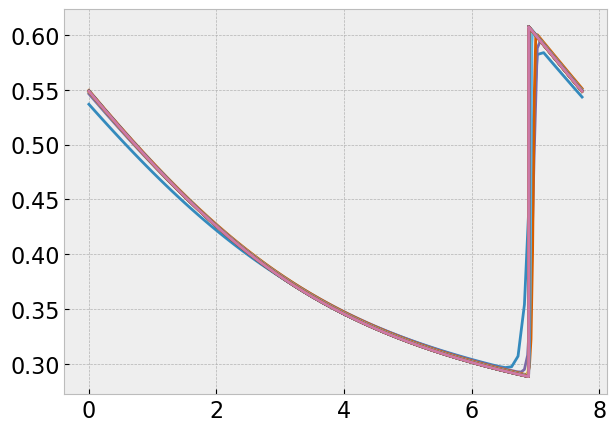

In [21]:
x_theo = np.linspace(0, L_tau_1, 100_000)
for j in range(len(dxs)):
    plt.plot(xs[j], rho_tau_1[j]/rho_max)
    plt.plot(x_theo, teo_rho_eta_tau_1(x_theo, T)/rho_max)

### $\tau = 5$

In [22]:
T = 2
s_max = get_s_max()
L_tau_5 = np.abs(x_minus_tau_5 - x_plus_tau_5)
path_T = base_path + "rho_s_0.433_Final_time_2/"
xs = []
dts = []

rho_tau_5 = []
u_tau_5 = []

tau_5_folder = path_T + "tau_5/"

# Tau 1
for j in range(len(dxs)):
    dt = dxs[j]/(2.1*s_max)
    dts += [dt]
    rho_name = tau_5_folder + "rho_dx_{}.npy.gz".format(dxs[j])
    u_name = tau_5_folder + "u_dx_{}.npy.gz".format(dxs[j])

    rho_file = gzip.GzipFile(rho_name, "r")
    rho = np.load(rho_file)
    rho_tau_5 += [rho]

    u_file = gzip.GzipFile(u_name, "r")
    u = np.load(u_file)
    u_tau_5 += [u]

    N = int(L_tau_5/dxs[j]+1)
    x = np.linspace(0, L_tau_5, N)
    xs += [x]

In [23]:
errors_rho_HLL_tau_5_T_2 = []
errors_u_HLL_tau_5_T_2 = []
n = 0

for j in range(len(dxs)):
    dx = dxs[j]
    dt = dts[j]
    error_rho = 100 * norm(teo_rho_eta_tau_5(xs[j], T+n*dt)- rho_tau_5[j], 1)/norm(teo_rho_eta_tau_5(xs[j], T+n*dt), 1)
    errors_rho_HLL_tau_5_T_2 += [error_rho]

    error_u = 100 * norm(teo_u_eta_tau_5(xs[j], T+n*dt)- u_tau_5[j], 1)/norm(teo_u_eta_tau_5(xs[j], T+n*dt), 1)
    errors_u_HLL_tau_5_T_2 += [error_u]

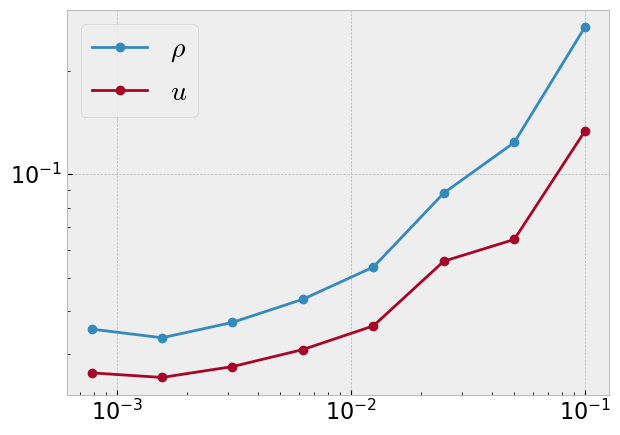

In [24]:
plt.plot(dxs, errors_rho_HLL_tau_5_T_2, "o-", label=r"$\rho$")
plt.plot(dxs, errors_u_HLL_tau_5_T_2, "o-", label=r"$u$")
plt.legend()
plt.yscale("log")
plt.xscale("log")

### $\tau = 10$

In [25]:
T = 2
s_max = get_s_max()
L_tau_10 = np.abs(x_minus_tau_10 - x_plus_tau_10)
path_T = base_path + "rho_s_0.433_Final_time_2/"
xs = []
dts = []

rho_tau_10 = []
u_tau_10 = []

tau_10_folder = path_T + "tau_10/"

# Tau 1
for j in range(len(dxs)):
    dt = dxs[j]/(2.1*s_max)
    dts += [dt]
    rho_name = tau_10_folder + "rho_dx_{}.npy.gz".format(dxs[j])
    u_name = tau_10_folder + "u_dx_{}.npy.gz".format(dxs[j])

    rho_file = gzip.GzipFile(rho_name, "r")
    rho = np.load(rho_file)
    rho_tau_10 += [rho]

    u_file = gzip.GzipFile(u_name, "r")
    u = np.load(u_file)
    u_tau_10 += [u]

    N = int(L_tau_10/dxs[j]+1)
    x = np.linspace(0, L_tau_10, N)
    xs += [x]

In [26]:
errors_rho_HLL_tau_10_T_2 = []
errors_u_HLL_tau_10_T_2 = []
n = 0

for j in range(len(dxs)):
    dx = dxs[j]
    dt = dts[j]
    error_rho = 100 * norm(teo_rho_eta_tau_10(xs[j], T+n*dt)- rho_tau_10[j], 1)/norm(teo_rho_eta_tau_10(xs[j], T+n*dt), 1)
    errors_rho_HLL_tau_10_T_2 += [error_rho]

    error_u = 100 * norm(teo_u_eta_tau_10(xs[j], T+n*dt)- u_tau_10[j], 1)/norm(teo_u_eta_tau_10(xs[j], T+n*dt), 1)
    errors_u_HLL_tau_10_T_2 += [error_u]

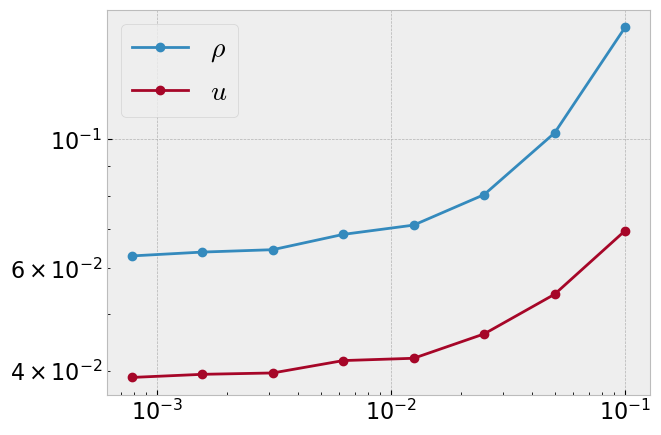

In [27]:
plt.plot(dxs, errors_rho_HLL_tau_10_T_2, "o-", label=r"$\rho$")
plt.plot(dxs, errors_u_HLL_tau_10_T_2, "o-", label=r"$u$")
plt.legend()
plt.yscale("log")
plt.xscale("log")

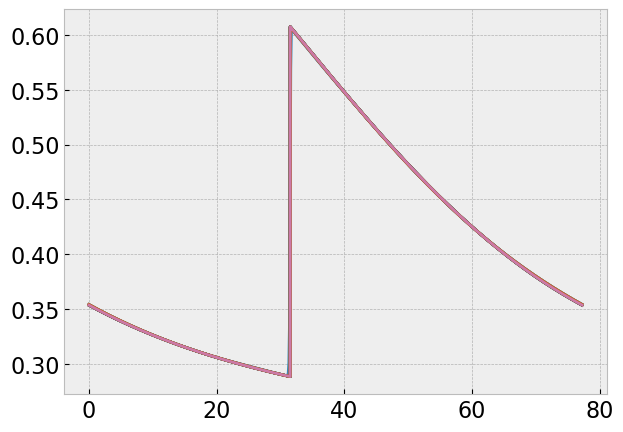

In [28]:
x_theo = np.linspace(0, L_tau_10, 100_000)
for j in range(len(dxs)):
    plt.plot(xs[j], rho_tau_10[j]/rho_max)
    plt.plot(x_theo, teo_rho_eta_tau_10(x_theo, T)/rho_max)

## Table

In [29]:
import pandas as pd

dxs = [(2)**(-j)/10 for j in range(8)]
dxs_sci = [sci_notation(dx) for dx in dxs]

In [30]:
col = pd.MultiIndex.from_arrays([
    [r'$\tau=1$', r'$\tau=1$', r'$\tau=5$', r'$\tau=5$', r'$\tau=10$', r'$\tau=10$'],
    [r"$\varepsilon_\rho^{\Delta x}$", r"$\varepsilon_u^{\Delta x}$", 
     r"$\varepsilon_\rho^{\Delta x}$", r"$\varepsilon_u^{\Delta x}$", 
     r"$\varepsilon_\rho^{\Delta x}$", r"$\varepsilon_u^{\Delta x}$"]
    ])


errors = np.array([errors_rho_HLL_tau_1, errors_u_HLL_tau_1, 
                             errors_rho_HLL_tau_5, errors_u_HLL_tau_5, 
                             errors_rho_HLL_tau_10, errors_u_HLL_tau_10]).T

data_HLL = pd.DataFrame(errors, columns=col, index=dxs_sci)
data_HLL.index.name=r"$\Delta x$"
data_HLL.to_latex(float_format="%.7f", buf="Img/Errors_tables/errors_HLL_T_0.5.txt")
data_HLL

$\tau=1$  \
                       $\varepsilon_\rho^{\Delta x}$   
$\Delta x$                                             
1.00 $ \times 10^{-1}$                      0.959960   
5.00 $ \times 10^{-2}$                      0.598449   
2.50 $ \times 10^{-2}$                      0.310103   
1.25 $ \times 10^{-2}$                      0.193404   
6.25 $ \times 10^{-3}$                      0.083154   
3.12 $ \times 10^{-3}$                      0.064409   
1.56 $ \times 10^{-3}$                      0.041777   
7.81 $ \times 10^{-4}$                      0.035139   

                                                   \
                       $\varepsilon_u^{\Delta x}$   
$\Delta x$                                          
1.00 $ \times 10^{-1}$                   0.592082   
5.00 $ \times 10^{-2}$                   0.394624   
2.50 $ \times 10^{-2}$                   0.200692   
1.25 $ \times 10^{-2}$                   0.113359   
6.25 $ \times 10^{-3}$                   0.040314   
3.12 $ \times 10^{-3}$                   0.033212   
1.56 $ \times 10^{-3}$                   0.020109   
7.81 $ \times 10^{-4}$                   0.015328   

                                            $\tau=5$  \
                       $\varepsilon_\rho^{\Delta x}$   
$\Delta x$                                             
1.00 $ \times 10^{-1}$                      0.211005   
5.00 $ \times 10^{-2}$                      0.126018   
2.50 $ \times 10^{-2}$                      0.084939   
1.25 $ \times 10^{-2}$                      0.056408   
6.25 $ \times 10^{-3}$                      0.053053   
3.12 $ \times 10^{-3}$                      0.042061   
1.56 $ \times 10^{-3}$                      0.039531   
7.81 $ \times 10^{-4}$                      0.038944   

                                                   \
                       $\varepsilon_u^{\Delta x}$   
$\Delta x$                                          
1.00 $ \times 10^{-1}$                   0.103649   
5.00 $ \times 10^{-2}$                   0.061528   
2.50 $ \times 10^{-2}$                   0.046025   
1.25 $ \times 10^{-2}$                   0.029552   
6.25 $ \times 10^{-3}$                   0.027192   
3.12 $ \times 10^{-3}$                   0.021136   
1.56 $ \times 10^{-3}$                   0.019702   
7.81 $ \times 10^{-4}$                   0.019319   

                                           $\tau=10$  \
                       $\varepsilon_\rho^{\Delta x}$   
$\Delta x$                                             
1.00 $ \times 10^{-1}$                      0.132113   
5.00 $ \times 10^{-2}$                      0.093167   
2.50 $ \times 10^{-2}$                      0.077922   
1.25 $ \times 10^{-2}$                      0.064734   
6.25 $ \times 10^{-3}$                      0.059877   
3.12 $ \times 10^{-3}$                      0.057576   
1.56 $ \times 10^{-3}$                      0.056863   
7.81 $ \times 10^{-4}$                      0.055929   

                                                   
                       $\varepsilon_u^{\Delta x}$  
$\Delta x$                                         
1.00 $ \times 10^{-1}$                   0.066172  
5.00 $ \times 10^{-2}$                   0.048159  
2.50 $ \times 10^{-2}$                   0.042891  
1.25 $ \times 10^{-2}$                   0.036052  
6.25 $ \times 10^{-3}$                   0.033890  
3.12 $ \times 10^{-3}$                   0.032800  
1.56 $ \times 10^{-3}$                   0.032566  
7.81 $ \times 10^{-4}$                   0.032094

In [31]:
errors_T_2 = np.array([errors_rho_HLL_tau_1_T_2, errors_u_HLL_tau_1_T_2, 
                             errors_rho_HLL_tau_5_T_2, errors_u_HLL_tau_5_T_2, 
                             errors_rho_HLL_tau_10_T_2, errors_u_HLL_tau_10_T_2]).T

data_HLL_T_2 = pd.DataFrame(errors_T_2, columns=col, index=dxs_sci)
data_HLL_T_2.index.name=r"$\Delta x$"
data_HLL_T_2.to_latex(float_format="%.7f", buf="Img/Errors_tables/errors_HLL_T_2.txt")
data_HLL_T_2

$\tau=1$  \
                       $\varepsilon_\rho^{\Delta x}$   
$\Delta x$                                             
1.00 $ \times 10^{-1}$                      1.635200   
5.00 $ \times 10^{-2}$                      1.003503   
2.50 $ \times 10^{-2}$                      1.068788   
1.25 $ \times 10^{-2}$                      0.580449   
6.25 $ \times 10^{-3}$                      0.204151   
3.12 $ \times 10^{-3}$                      0.187599   
1.56 $ \times 10^{-3}$                      0.113142   
7.81 $ \times 10^{-4}$                      0.081888   

                                                   \
                       $\varepsilon_u^{\Delta x}$   
$\Delta x$                                          
1.00 $ \times 10^{-1}$                   0.882439   
5.00 $ \times 10^{-2}$                   0.497070   
2.50 $ \times 10^{-2}$                   0.426433   
1.25 $ \times 10^{-2}$                   0.250653   
6.25 $ \times 10^{-3}$                   0.102194   
3.12 $ \times 10^{-3}$                   0.092180   
1.56 $ \times 10^{-3}$                   0.061032   
7.81 $ \times 10^{-4}$                   0.045321   

                                            $\tau=5$  \
                       $\varepsilon_\rho^{\Delta x}$   
$\Delta x$                                             
1.00 $ \times 10^{-1}$                      0.267328   
5.00 $ \times 10^{-2}$                      0.123737   
2.50 $ \times 10^{-2}$                      0.088177   
1.25 $ \times 10^{-2}$                      0.053697   
6.25 $ \times 10^{-3}$                      0.043291   
3.12 $ \times 10^{-3}$                      0.037066   
1.56 $ \times 10^{-3}$                      0.033435   
7.81 $ \times 10^{-4}$                      0.035442   

                                                   \
                       $\varepsilon_u^{\Delta x}$   
$\Delta x$                                          
1.00 $ \times 10^{-1}$                   0.133242   
5.00 $ \times 10^{-2}$                   0.064615   
2.50 $ \times 10^{-2}$                   0.055849   
1.25 $ \times 10^{-2}$                   0.036205   
6.25 $ \times 10^{-3}$                   0.030903   
3.12 $ \times 10^{-3}$                   0.027569   
1.56 $ \times 10^{-3}$                   0.025637   
7.81 $ \times 10^{-4}$                   0.026432   

                                           $\tau=10$  \
                       $\varepsilon_\rho^{\Delta x}$   
$\Delta x$                                             
1.00 $ \times 10^{-1}$                      0.155793   
5.00 $ \times 10^{-2}$                      0.102588   
2.50 $ \times 10^{-2}$                      0.080347   
1.25 $ \times 10^{-2}$                      0.071211   
6.25 $ \times 10^{-3}$                      0.068641   
3.12 $ \times 10^{-3}$                      0.064606   
1.56 $ \times 10^{-3}$                      0.063997   
7.81 $ \times 10^{-4}$                      0.063030   

                                                   
                       $\varepsilon_u^{\Delta x}$  
$\Delta x$                                         
1.00 $ \times 10^{-1}$                   0.069641  
5.00 $ \times 10^{-2}$                   0.054147  
2.50 $ \times 10^{-2}$                   0.046281  
1.25 $ \times 10^{-2}$                   0.042025  
6.25 $ \times 10^{-3}$                   0.041644  
3.12 $ \times 10^{-3}$                   0.039650  
1.56 $ \times 10^{-3}$                   0.039437  
7.81 $ \times 10^{-4}$                   0.038953